Dans la cellule de code suivante, nous avons lancé plusieurs simulation de notre file pour observer l'évaluation du temps de réponse moyen pour chaque valeur de C {1; 2; 3; 6} en fonction de λ.

In [11]:
import routeur

LAMBDA_REQUETE = 2.3

C = 1

T_MAX = 1000

routeur.simul_fifo(LAMBDA_REQUETE, C, T_MAX)

{'temp_moyen_attente_client': 21.75162589738966, 'taux_rejet': 0.0}

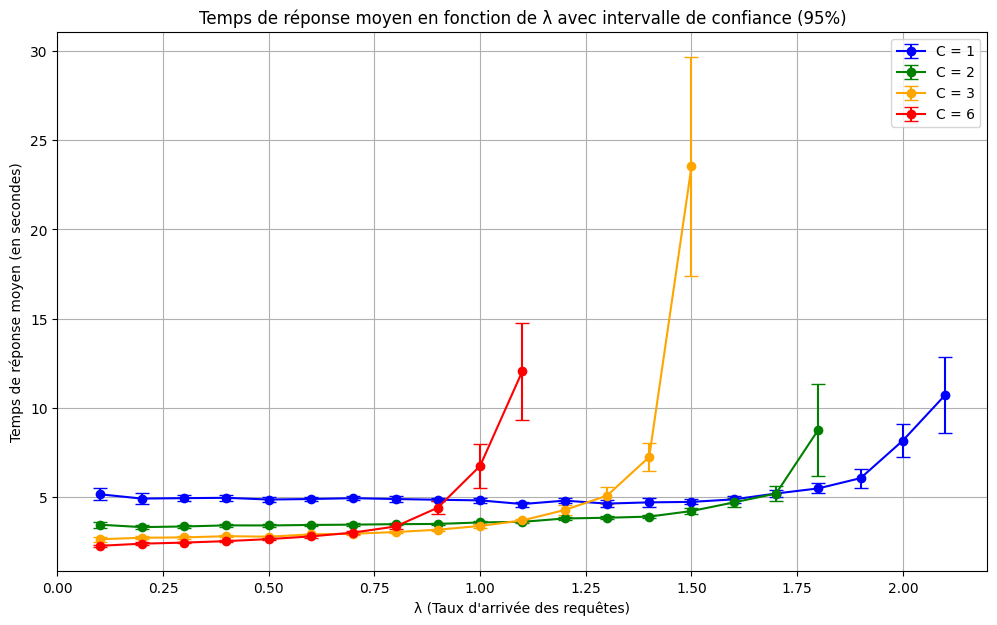

In [ ]:
import routeur
import matplotlib.pyplot as plt
import numpy as np

# Fonctions statistiques personnalisées
def moyenne(data):
    return sum(data) / len(data)

def variance(data):
    m = moyenne(data)
    data = [(e - m) ** 2 for e in data]
    return sum(data) / (len(data) - 1)

def intervalle_confiance(data):
    m = moyenne(data)
    v = variance(data)
    d = 1.96 * (v / len(data)) ** 0.5
    return m, d  # moyenne et demi-largeur de l'IC

# Paramètres de simulation
T_MAX = 1000
C_values = [1, 2, 3, 6]
N_SIMULATIONS = 10  # Nombre de répétitions par point

# Tracé des courbes avec zones d'incertitude
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'orange', 'red']

for idx, C in enumerate(C_values):
    lambda_requete = 0.1
    lambdas = []
    moyennes = []
    ic_inf = []
    ic_sup = []

    while True:
        temps_reponses = []

        # Lancer plusieurs simulations pour estimer l'intervalle de confiance
        for _ in range(N_SIMULATIONS):
            res = routeur.simul_fifo(lambda_requete, C, T_MAX)
            if res["taux_rejet"] > 0.05:
                break
            temps_reponses.append(res["temp_moyen_attente_client"])
        else:
            # Si toutes les simulations sont valides, calculer IC
            m, d = intervalle_confiance(temps_reponses)
            lambdas.append(lambda_requete)
            moyennes.append(m)
            ic_inf.append(m - d)
            ic_sup.append(m + d)
            lambda_requete += 0.1
            continue

        break  # Arrêt dès qu'une simulation dépasse le taux de rejet

    # Courbe moyenne
    plt.plot(lambdas, moyennes, label=f'C = {C}', color=colors[idx], marker='o')

    # Ombre de l'intervalle de confiance
    plt.fill_between(lambdas, ic_inf, ic_sup, color=colors[idx], alpha=0.2)

# Mise en page
plt.title("Temps de réponse moyen avec intervalle de confiance à 95% (ombre)")
plt.xlabel("λ (Taux d'arrivée des requêtes)")
plt.ylabel("Temps de réponse moyen (en secondes)")
plt.grid(True)
plt.legend()
plt.show()
